In [ ]:
#pip install pycaret

In [1]:
from pycaret.utils import version
version()

1.0.0


# 1. Loading dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initializing Setup

In [3]:
from pycaret.regression import *

reg1 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2815.8431,2.048964e+07,4526.5478,0.8776,0.3940,0.2995
1,3607.3637,3.481924e+07,5900.7828,0.7975,0.4555,0.3529
2,3021.0207,2.326287e+07,4823.1601,0.7055,0.5815,0.3948
3,3193.7966,2.591245e+07,5090.4272,0.7836,0.5432,0.4356
4,3172.6050,2.788106e+07,5280.2517,0.7926,0.4516,0.2867
5,3222.1065,2.310720e+07,4806.9945,0.8514,0.3786,0.2861
6,2865.4398,2.438587e+07,4938.2051,0.8341,0.3930,0.3251
7,3400.1889,2.942705e+07,5424.6705,0.8382,0.4764,0.3169
8,3003.7402,2.194569e+07,4684.6232,0.8583,0.3833,0.3208
9,3154.9844,2.829284e+07,5319.1016,0.8178,0.4987,0.3544


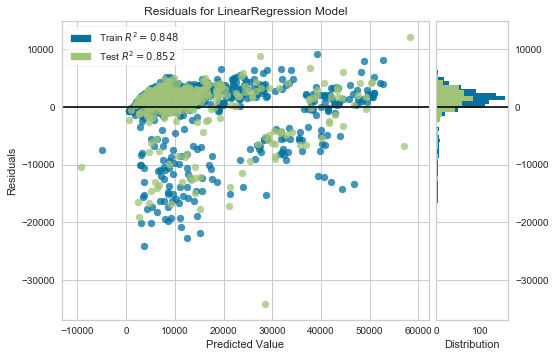

In [5]:
plot_model(lr)

# 3. Save Model for deployment

In [6]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


In [7]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Sucessfully Loaded


In [8]:
deployment_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

# 4. Generate Predictions from deployed app

In [10]:
import requests
url = 'https://pycaret-demo1.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
